In [1]:
# Essentials
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Cleaning
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

# Modeling
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import  Ridge

# Scoring
from sklearn.metrics import mean_squared_error

# Presentation
import datetime

### Data cleaning

In [2]:
class ModelData():
    def __init__(self):
        ## Import Raw Datasets
        self.data = pd.read_csv('./datasets/train.csv')
        self.data_raw = self.data.copy()
        self.testing_data = pd.read_csv('./datasets/test.csv')
        
        ## Clean data
        column_dict = {
                        'Id': 'id',
                        'PID': 'pid',
                        'MS SubClass': 'ms_subclass',
                        'MS Zoning': 'ms_zoning',
                        'Lot Frontage': 'frontage',
                        'Lot Area': 'lot_sqft',
                        'Street': 'street_material',
                        'Alley': 'alley',
                        'Lot Shape': 'shape',
                        'Land Contour': 'contour',
                        'Utilities': 'utilities',
                        'Lot Config': 'config',
                        'Land Slope': 'slope',
                        'Neighborhood': 'neighborhood',
                        'Condition 1': 'cond_1',
                        'Condition 2': 'cond_2',
                        'Bldg Type': 'type',
                        'House Style': 'style',
                        'Overall Qual': 'quality',
                        'Overall Cond': 'condition',
                        'Year Built': 'year',
                        'Year Remod/Add': 'remod_year',
                        'Roof Style': 'roof',
                        'Roof Matl': 'roof_mat',
                        'Exterior 1st': 'ext_1',
                        'Exterior 2nd': 'ext_2',
                        'Mas Vnr Type': 'mas_vnr_type',
                        'Mas Vnr Area': 'mas_vnr_area',
                        'Exter Qual': 'exter_qual',
                        'Exter Cond': 'exter_cond',
                        'Foundation': 'foundation',
                        'Bsmt Qual': 'basement_qual',
                        'Bsmt Cond': 'basement_cond',
                        'Bsmt Exposure': 'basement_exposure',
                        'BsmtFin Type 1': 'basement_fin_1',
                        'BsmtFin SF 1': 'basement_fin_sqft_1',
                        'BsmtFin Type 2': 'basement_fin_2',
                        'BsmtFin SF 2': 'basement_fin_sqft_2',
                        'Bsmt Unf SF': 'basement_unfin_sqft',
                        'Total Bsmt SF': 'total_basement_sqft',
                        'Heating': 'heating',
                        'Heating QC': 'heating_qc',
                        'Central Air': 'ac',
                        'Electrical': 'electrical',
                        '1st Flr SF': 'sqft_1',
                        '2nd Flr SF': 'sqft_2',
                        'Low Qual Fin SF': 'low_qual_sqft',
                        'Gr Liv Area': 'gr_living_sqft',
                        'Bsmt Full Bath': 'basement_bath',
                        'Bsmt Half Bath': 'basement_half_bath',
                        'Full Bath': 'full_bath',
                        'Half Bath': 'half_bath',
                        'Bedroom AbvGr': 'bed',
                        'Kitchen AbvGr': 'kitchen',
                        'Kitchen Qual': 'kitchen_qual',
                        'TotRms AbvGrd': 'rooms_total',
                        'Functional': 'functional',
                        'Fireplaces': 'fireplaces',
                        'Fireplace Qu': 'fireplace_qual',
                        'Garage Type': 'garage_type',
                        'Garage Yr Blt': 'garage_year',
                        'Garage Finish': 'garage_finish',
                        'Garage Cars': 'garage_size',
                        'Garage Area': 'garage_sqft',
                        'Garage Qual': 'garage_qual',
                        'Garage Cond': 'garage_cond',
                        'Paved Drive': 'paved_drive',
                        'Wood Deck SF': 'deck_wood_sqft',
                        'Open Porch SF': 'porch_sqft',
                        'Enclosed Porch': 'porch_enc_sqft',
                        '3Ssn Porch': 'porch_3_ssn',
                        'Screen Porch': 'porch_screened',
                        'Pool Area': 'pool_sqft',
                        'Pool QC': 'pool_qc',
                        'Fence': 'fence',
                        'Misc Feature': 'misc',
                        'Misc Val': 'misc_sqft',
                        'Mo Sold': 'sold_month',
                        'Yr Sold': 'sold_year',
                        'Sale Type': 'sale_type',
                        'SalePrice': 'price'
                    }
        self.data.rename(columns=column_dict, inplace=True)
        self.testing_data.rename(columns=column_dict, inplace=True)
        
        ##############################################################
        # Data cleaning

        ## Fill Missing Values
        # Impute missing data by property type
        for c in ['frontage']:
        # sets index to type, makes a dict of median values of target var based on group by category, then applies that grouped median to null values of target var and saves in place
            self.data[c] = self.data.set_index(['type'])[c].fillna(self.data[['type', c]].groupby(['type']).median().to_dict()[c]).reset_index()[c]
            self.testing_data[c] = self.data.set_index(['type'])[c].fillna(self.data[['type', c]].groupby(['type']).median().to_dict()[c]).reset_index()[c]

        # Fill Missing Data
        # Categorical
        for c in ['mas_vnr_type', 'alley']:
            self.data[c].fillna('None', inplace=True)
            self.testing_data[c].fillna('None', inplace=True)

        # Numeric
        for c in ['mas_vnr_area', 'basement_fin_sqft_1', 'basement_fin_sqft_2', 'basement_unfin_sqft', 'total_basement_sqft', 'basement_bath', 'basement_half_bath',
                  'garage_size', 'garage_sqft']:
            self.data[c].fillna(0, inplace=True)
            self.testing_data[c].fillna(0, inplace=True)


        # garage_year (with outlier / error)
        self.data['garage_year'].fillna(self.data[self.data['garage_year'].notna()]['garage_year'].min(), inplace=True)
        self.testing_data['garage_year'].fillna(self.data[self.data['garage_year'].notna()]['garage_year'].min(), inplace=True)
        self.data.at[1699,'garage_year'] = 2006 # incorrect data, changing to year property was built
        # sqft features are likely entered incorrectly. imputed more likely values below. imputed value is 1822
        self.data.at[960,'gr_living_sqft'] = 1822
        self.data.at[1885,'gr_living_sqft'] = 1822
        # misc
        self.data.drop(columns=['misc'], inplace=True)
        self.testing_data.drop(columns=['misc'], inplace=True)
        # utilities
        self.data.drop(columns=['utilities'], inplace=True)
        self.testing_data.drop(columns=['utilities'], inplace=True)
        # roof_mat
        self.data.drop(columns=['roof_mat'], inplace=True)
        self.testing_data.drop(columns=['roof_mat'], inplace=True)
        # ext 1 & 2
        self.data.drop(columns=['ext_1', 'ext_2'], inplace=True)
        self.testing_data.drop(columns=['ext_1', 'ext_2'], inplace=True)

        # Ordinal Encoding
        enc = OrdinalEncoder(categories=[[np.NaN, 'Po', 'Fa', 'TA', 'Gd', 'Ex']])
        # All the categories in the list are logged in the original data dictonary as ordinal. They follow a simple logic.
        for c in ['basement_qual', 'basement_cond', 'heating_qc', 'kitchen_qual', 'fireplace_qual', 'garage_qual', 'garage_cond', 'pool_qc', 'exter_qual', 'exter_cond']:
            self.data[[c]] = enc.fit_transform(self.data[[c]])
            self.data[c].fillna(0, inplace=True)

            self.testing_data[[c]] = enc.fit_transform(self.testing_data[[c]])
            self.testing_data[c].fillna(0, inplace=True)
        
        self.data['basement_exposure'] = self.data['basement_exposure'].map({'Gd':4, 'Av':3, 'Mn': 2, 'No':1, np.NaN:0})
        self.testing_data['basement_exposure'] = self.testing_data['basement_exposure'].map({'Gd':4, 'Av':3, 'Mn': 2, 'No':1, np.NaN:0})

        self.data['basement_fin_1'] = self.data['basement_fin_1'].map({'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, np.NaN:0})
        self.testing_data['basement_fin_1'] = self.testing_data['basement_fin_1'].map({'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, np.NaN:0})
        
        self.data['basement_fin_2'] = self.data['basement_fin_2'].map({'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, np.NaN:0})
        self.testing_data['basement_fin_2'] = self.testing_data['basement_fin_2'].map({'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, np.NaN:0})

        self.data['garage_finish'] = self.data['garage_finish'].map({np.NaN:0, 'NA':0, 'Unf':1, 'RFn':2, 'Fin':3})
        self.testing_data['garage_finish'] = self.testing_data['garage_finish'].map({np.NaN:0, 'NA':0, 'Unf':1, 'RFn':2, 'Fin':3})

        self.data['fence'] = self.data['fence'].map({'GdPrv':4, 'MnPrv':3, 'GdWo':2, 'MnWw':1, 'NA':0, np.NaN:0})
        self.testing_data['fence'] = self.testing_data['fence'].map({'GdPrv':4, 'MnPrv':3, 'GdWo':2, 'MnWw':1, 'NA':0, np.NaN:0})

        self.data['electrical'] = self.data['electrical'].map({np.NaN:0, 'Mix':1, 'FuseP':2, 'FuseF':3, 'FuseA':4, 'SBrkr':5})
        self.testing_data['electrical'] = self.testing_data['electrical'].map({np.NaN:0, 'Mix':1, 'FuseP':2, 'FuseF':3, 'FuseA':4, 'SBrkr':5})

        self.data['shape'] = self.data['shape'].map({'IR3':0, 'IR2':1, 'IR1':2, 'Reg':3, np.NaN:0})
        self.testing_data['shape'] = self.testing_data['shape'].map({'IR3':0, 'IR2':1, 'IR1':2, 'Reg':3, np.NaN:0})

        # flat land is usable land. following a basic assumption
        self.data['slope'] = self.data['slope'].map({'Sev':0, 'Mod':1, 'Gtl':2, np.NaN:1})
        self.testing_data['slope'] = self.testing_data['slope'].map({'Sev':0, 'Mod':1, 'Gtl':2, np.NaN:1})

        # nobody wants to live near a railroad or on a busy street. Weights are applied to suit.
        self.data['cond_1'] = self.data['cond_1'].map({'Norm':1, 'Feedr':1, 'Artery':2, 'RRAn':3, 'PosN':0, 'RRAe':3, 'PosA':0, 'RRNn':3, 'RRNe':3})
        self.data['cond_2'] = self.data['cond_2'].map({'Norm':1, 'Feedr':1, 'Artery':2, 'RRAn':3, 'PosN':0, 'RRAe':3, 'PosA':0, 'RRNn':3, 'RRNe':3})
        self.data['conds'] = self.data[['cond_1', 'cond_2']].max(axis=1)
        self.data.drop(['cond_1', 'cond_2'], axis=1, inplace=True)
        self.testing_data['cond_1'] = self.testing_data['cond_1'].map({'Norm':1, 'Feedr':1, 'Artery':2, 'RRAn':3, 'PosN':0, 'RRAe':3, 'PosA':0, 'RRNn':3, 'RRNe':3})
        self.testing_data['cond_2'] = self.testing_data['cond_2'].map({'Norm':1, 'Feedr':1, 'Artery':2, 'RRAn':3, 'PosN':0, 'RRAe':3, 'PosA':0, 'RRNn':3, 'RRNe':3})
        self.testing_data['conds'] = self.testing_data[['cond_1', 'cond_2']].max(axis=1)
        self.testing_data.drop(['cond_1', 'cond_2'], axis=1, inplace=True)

        self.data['style'] = self.data['style'].map({'1.5Fin': 1, '1.5Unf': 1, '1Story': 1, '2.5Fin':2, '2.5Unf':2, '2Story':2, 'SFoyer':1, 'SLvl':1})
        self.testing_data['style'] = self.testing_data['style'].map({'1.5Fin': 1, '1.5Unf': 1, '1Story': 1, '2.5Fin':2, '2.5Unf':2, '2Story':2, 'SFoyer':1, 'SLvl':1})

        self.data['foundation'] = self.data['foundation'].map({'Slab':0, 'Stone':1, 'BrkTil':2, 'CBlock':3, 'PConc':4, 'Wood':5})
        self.testing_data['foundation'] = self.testing_data['foundation'].map({'Slab':0, 'Stone':1, 'BrkTil':2, 'CBlock':3, 'PConc':4, 'Wood':5})

        self.data['heating'] = self.data['heating'].map({'GasW':1, 'Grav':0, 'OthW':0, 'Wall':0, 'Floor':0, 'GasA':2})
        self.testing_data['heating'] = self.testing_data['heating'].map({'GasW':1, 'Grav':0, 'OthW':0, 'Wall':0, 'Floor':0, 'GasA':2})

        self.data['functional'] = self.data['functional'].map({'Sal':0, 'Sev':1, 'Maj2':2, 'Maj1':3, 'Mod':4, 'Min2':5, 'Min1':6, 'Typ':7})
        self.testing_data['functional'] = self.testing_data['functional'].map({'Sal':0, 'Sev':1, 'Maj2':2, 'Maj1':3, 'Mod':4, 'Min2':5, 'Min1':6, 'Typ':7})

        self.data['sale_type'] = self.data['sale_type'].replace({'COD': 0, 'ConLw': 1, 'ConLD': 1, 'Oth': 2, 'WD ': 2, 'ConLI': 3, 'CWD': 3, 'New': 4, 'Con': 5, 'VWD': 2})
        self.testing_data['sale_type'] = self.testing_data['sale_type'].replace({'COD': 0, 'ConLw': 1, 'ConLD': 1, 'Oth': 2, 'WD ': 2, 'ConLI': 3, 'CWD': 3, 'New': 4, 'Con': 5, 'VWD': 2})

        # Categorical Encoding
        # garage_type
        self.data['garage_type'] = self.data['garage_type'].map({np.NaN:0, 'Attchd':1, 'Detchd':2, 'BuiltIn':3, 'Basment':4, '2Types':5, 'CarPort':6})
        self.testing_data['garage_type'] = self.testing_data['garage_type'].map({np.NaN:0, 'Attchd':1, 'Detchd':2, 'BuiltIn':3, 'Basment':4, '2Types':5, 'CarPort':6})

        ohe = OneHotEncoder(handle_unknown='ignore', drop='first', sparse=False)
        enc = pd.DataFrame(ohe.fit_transform(self.data[['garage_type']]), columns=['gar_attached', 'gar_detached', 'gar_builtin', 'gar_basement', 'gar_2types', 'gar_carport'], index=self.data.index)
        self.data = self.data.join(enc)
        self.data.drop(['garage_type'], inplace=True, axis=1)
        enc = pd.DataFrame(ohe.transform(self.testing_data[['garage_type']]), columns=['gar_attached', 'gar_detached', 'gar_builtin', 'gar_basement', 'gar_2types', 'gar_carport'], index=self.testing_data.index)
        self.testing_data = self.testing_data.join(enc)
        self.testing_data.drop(['garage_type'], inplace=True, axis=1)
        
        self.cats_garage = ['gar_attached', 'gar_detached', 'gar_builtin', 'gar_basement', 'gar_2types', 'gar_carport']

        # zoning
        self.data['ms_zoning'] = self.data['ms_zoning'].map({'C (all)': 'C', 'I (all)': 'C', 'A (agr)': 'C', 'RL': 'RL', 'RM': 'RM', 'FV': 'FV', 'RH': 'RH'})
        self.testing_data['ms_zoning'] = self.testing_data['ms_zoning'].map({'C (all)': 'C', 'I (all)': 'C', 'A (agr)': 'C', 'RL': 'RL', 'RM': 'RM', 'FV': 'FV', 'RH': 'RH'})

        ohe = OneHotEncoder(categories=[['C', 'RH', 'FV', 'RM', 'RL']], handle_unknown='ignore', drop='first', sparse=False)    
        enc = pd.DataFrame(ohe.fit_transform(self.data[['ms_zoning']]), columns=['zone_res_hi', 'zone_res_vil', 'zone_res_med', 'zone_res_low'], index=self.data.index)
        self.data = self.data.join(enc)
        self.data.drop(['ms_zoning'], inplace=True, axis=1)
        enc = pd.DataFrame(ohe.transform(self.testing_data[['ms_zoning']]), columns=['zone_res_hi', 'zone_res_vil', 'zone_res_med', 'zone_res_low'], index=self.testing_data.index)
        self.testing_data = self.testing_data.join(enc)
        self.testing_data.drop(['ms_zoning'], inplace=True, axis=1)
        
        self.cats_zoning = ['zone_res_hi', 'zone_res_vil', 'zone_res_med', 'zone_res_low']


        # alley
        ohe = OneHotEncoder(categories=[['None', 'Grvl', 'Pave']], handle_unknown='ignore', drop='first', sparse=False)    
        enc = pd.DataFrame(ohe.fit_transform(self.data[['alley']]), columns=['alley_gravel', 'alley_pave'], index=self.data.index)
        self.data = self.data.join(enc)
        self.data.drop(['alley'], inplace=True, axis=1)
        enc = pd.DataFrame(ohe.transform(self.testing_data[['alley']]), columns=['alley_gravel', 'alley_pave'], index=self.testing_data.index)
        self.testing_data = self.testing_data.join(enc)
        self.testing_data.drop(['alley'], inplace=True, axis=1)

        self.cats_alley = ['alley_gravel', 'alley_pave']

        # contour
        ohe = OneHotEncoder(categories=[['Low', 'HLS', 'Bnk', 'Lvl']], handle_unknown='ignore', drop='first', sparse=False)    
        enc = pd.DataFrame(ohe.fit_transform(self.data[['contour']]), columns=['contour_hill', 'contour_bank', 'contour_level'], index=self.data.index)
        self.data = self.data.join(enc)
        self.data.drop(['contour'], inplace=True, axis=1)
        enc = pd.DataFrame(ohe.transform(self.testing_data[['contour']]), columns=['contour_hill', 'contour_bank', 'contour_level'], index=self.testing_data.index)
        self.testing_data = self.testing_data.join(enc)
        self.testing_data.drop(['contour'], inplace=True, axis=1)

        self.cats_contour = ['contour_hill', 'contour_bank', 'contour_level']

        # config
        ohe = OneHotEncoder(categories=[['FR3', 'FR2', 'CulDSac', 'Corner', 'Inside']], handle_unknown='ignore', drop='first', sparse=False)    
        enc = pd.DataFrame(ohe.fit_transform(self.data[['config']]), columns=['config_fr_2', 'config_culd', 'config_corner', 'config_inside'], index=self.data.index)
        self.data = self.data.join(enc)
        self.data.drop(['config'], inplace=True, axis=1)
        enc = pd.DataFrame(ohe.transform(self.testing_data[['config']]), columns=['config_fr_2', 'config_culd', 'config_corner', 'config_inside'], index=self.testing_data.index)
        self.testing_data = self.testing_data.join(enc)
        self.testing_data.drop(['config'], inplace=True, axis=1)

        self.cats_config = ['config_fr_2', 'config_culd', 'config_corner', 'config_inside']

        # neighborhood
        neighbs = ['Landmrk', 'GrnHill', 'Greens', 'Blueste', 'NPkVill', 'Veenker', 'BrDale', 'Blmngtn', 'MeadowV', 'ClearCr', 'SWISU', 'StoneBr', 'Timber', 'NoRidge', 'IDOTRR', 'Crawfor','BrkSide', 'Mitchel', 'SawyerW', 'NWAmes', 'Sawyer', 'Gilbert', 'NridgHt', 'Somerst', 'Edwards', 'OldTown', 'CollgCr', 'NAmes']
        neighbs_cols = ['n_grnhill', 'n_greens', 'n_blueste', 'n_npkvill', 'n_veenker', 'n_brdale', 'n_blmngtn', 'n_meadowv', 'n_clearcr', 'n_swisu', 'n_stonebr', 'n_timber', 'n_noridge', 'n_idotrr', 'n_crawfor','n_brkside', 'n_mitchel', 'n_sawyerw', 'n_nwames', 'n_sawyer', 'n_gilbert', 'n_nridght', 'n_somerst', 'n_edwards', 'n_oldtown', 'n_collgcr', 'n_names']

        ohe = OneHotEncoder(categories=[neighbs], handle_unknown='ignore', drop='first', sparse=False)    
        enc = pd.DataFrame(ohe.fit_transform(self.data[['neighborhood']]), columns=neighbs_cols, index=self.data.index)
        self.data = self.data.join(enc)
        self.data.drop(['neighborhood'], inplace=True, axis=1)
        enc = pd.DataFrame(ohe.transform(self.testing_data[['neighborhood']]), columns=neighbs_cols, index=self.testing_data.index)
        self.testing_data = self.testing_data.join(enc)
        self.testing_data.drop(['neighborhood'], inplace=True, axis=1)

        self.cats_neighborhood = neighbs_cols

        # type
        self.data['type'].replace('2fmCon', 'Duplex', inplace=True)
        self.testing_data['type'].replace('2fmCon', 'Duplex', inplace=True)

        ohe = OneHotEncoder(categories=[['Duplex', 'Twnhs', '1Fam', 'TwnhsE']], handle_unknown='ignore', drop='first', sparse=False)    
        enc = pd.DataFrame(ohe.fit_transform(self.data[['type']]), columns=['type_twn', 'type_sf', 'type_twn_end'], index=self.data.index)
        self.data = self.data.join(enc)
        self.data.drop(['type'], inplace=True, axis=1)
        enc = pd.DataFrame(ohe.transform(self.testing_data[['type']]), columns=['type_twn', 'type_sf', 'type_twn_end'], index=self.testing_data.index)
        self.testing_data = self.testing_data.join(enc)
        self.testing_data.drop(['type'], inplace=True, axis=1)

        self.cats_type = ['type_twn', 'type_sf', 'type_twn_end']

        # roof
        self.data['roof'] = self.data['roof'].map({'Gable':'Gable', 'Hip':'Hip', 'Flat':'Unc', 'Gambrel':'Unc', 'Mansard':'Unc', 'Shed':'Unc'})
        self.testing_data['roof'] = self.testing_data['roof'].map({'Gable':'Gable', 'Hip':'Hip', 'Flat':'Unc', 'Gambrel':'Unc', 'Mansard':'Unc', 'Shed':'Unc'})

        ohe = OneHotEncoder(categories=[['Unc', 'Hip', 'Gable']], handle_unknown='ignore', drop='first', sparse=False)
        enc = pd.DataFrame(ohe.fit_transform(self.data[['roof']]), columns=['roof_hip', 'roof_gable'], index=self.data.index)
        self.data = self.data.join(enc)
        self.data.drop(['roof'], inplace=True, axis=1)
        enc = pd.DataFrame(ohe.transform(self.testing_data[['roof']]), columns=['roof_hip', 'roof_gable'], index=self.testing_data.index)
        self.testing_data = self.testing_data.join(enc)
        self.testing_data.drop(['roof'], inplace=True, axis=1)

        self.cats_roof = ['roof_hip', 'roof_gable']

        # mas_vnr_type
        ohe = OneHotEncoder(categories=[['None', 'CBlock', 'BrkCmn', 'BrkFace', 'Stone']], handle_unknown='ignore', drop='first', sparse=False)
        enc = pd.DataFrame(ohe.fit_transform(self.data[['mas_vnr_type']]), columns=['vaneer_brk_c', 'vaneer_cb', 'vaneer_brk_face', 'vaneer_stone'], index=self.data.index)
        self.data = self.data.join(enc)
        self.data.drop(['mas_vnr_type'], inplace=True, axis=1)
        enc = pd.DataFrame(ohe.transform(self.testing_data[['mas_vnr_type']]), columns=['vaneer_brk_c', 'vaneer_cb', 'vaneer_brk_face', 'vaneer_stone'], index=self.testing_data.index)
        self.testing_data = self.testing_data.join(enc)
        self.testing_data.drop(['mas_vnr_type'], inplace=True, axis=1)

        self.cats_siding = ['vaneer_brk_c', 'vaneer_cb', 'vaneer_brk_face', 'vaneer_stone']

        # Binary Encoding
        # street_material
        self.data['street_material'] = self.data['street_material'].map({'Grvl':0, 'Pave':1, np.NaN:0})
        self.testing_data['street_material'] = self.testing_data['street_material'].map({'Grvl':0, 'Pave':1, np.NaN:0})   

        self.data['ac'] = self.data['ac'].map({'N':0, 'Y':1, np.NaN:0})
        self.testing_data['ac'] = self.testing_data['ac'].map({'N':0, 'Y':1, np.NaN:0})


    
        ##############################################################
        ## Feature Creations
        # log price (has a more normal distribution than price alone)
        self.data['price_log'] = np.log(self.data['price']) 
        # price/sqft (for feature selection and EDA only)
        self.data['p_sqft'] = self.data['price'] / self.data['gr_living_sqft']
        # sold month
        self.data['sold_year_mo'] = round(self.data['sold_year'] + self.data['sold_month'] / 12, 2)
        self.testing_data['sold_year_mo'] = round(self.testing_data['sold_year'] + self.testing_data['sold_month'] / 12, 2)
        # baths
        self.data['baths'] = self.data['full_bath'] + self.data['half_bath']
        self.testing_data['baths'] = self.testing_data['full_bath'] + self.testing_data['half_bath']
        

In [3]:
model = ModelData()

In [4]:
target = 'price_log'
features = ['n_grnhill', 'n_greens', 'n_blueste', 'n_npkvill', 'n_veenker', 'n_brdale', 'n_blmngtn', 'n_meadowv', 'n_clearcr', 'n_swisu', 'n_stonebr', 'n_timber', 
'n_noridge', 'n_idotrr', 'n_crawfor', 'n_brkside', 'n_mitchel', 'n_sawyerw', 'n_nwames', 'n_sawyer', 'n_gilbert', 'n_nridght', 'n_somerst', 'n_edwards', 'n_oldtown', 
'n_collgcr', 'n_names', 'type_twn', 'type_sf', 'type_twn_end', 'gar_attached', 'gar_detached', 'gar_builtin', 'gar_basement', 'gar_2types', 'gar_carport', 'quality', 
'gr_living_sqft', 'kitchen_qual', 'garage_sqft', 'garage_size', 'total_basement_sqft', 'sqft_1', 'basement_qual', 'year', 'garage_finish', 'garage_year', 'remod_year', 
'baths', 'fireplace_qual', 'full_bath', 'mas_vnr_area', 'foundation', 'fireplaces', 'heating_qc', 'basement_exposure', 'basement_fin_sqft_1', 'gar_attached', 'sale_type', 
'basement_fin_1', 'shape', 'fence', 'kitchen', 'conds', 'condition', 'street_material', 'low_qual_sqft', 'lot_sqft', 'electrical', 'heating', 'basement_fin_2',
'sold_year_mo', 'basement_fin_sqft_2', ] + model.cats_contour + model.cats_alley

----

In [5]:
# Best model:
# Train on all data
X_train = model.data[features]  # ended up being the best
y_train = model.data['price_log']

params_r = {'alpha':[250, 500, 1000, 1500]}

# Instantiate
ridge = Ridge(random_state=14)
poly = PolynomialFeatures(degree=2, include_bias=False)
ss = StandardScaler()
gs_r = GridSearchCV(ridge, params_r, n_jobs=-1)

# transform data
X_train_poly = pd.DataFrame(poly.fit_transform(X_train), columns=poly.get_feature_names_out(), index=X_train.index)
X_train_scaled = pd.DataFrame(ss.fit_transform(X_train_poly), columns=X_train_poly.columns, index=X_train.index)

# train
gs_r.fit(X_train_scaled, y_train)

# score
ridge_train_r2 = gs_r.score(X_train_scaled, y_train)
ridge_train_rmse = round(mean_squared_error(np.exp(y_train), np.exp(gs_r.predict(X_train_scaled)), squared=False), 0)

print(f'Ridge Best Est: {gs_r.best_estimator_}')
print(f'Ridge Train R2: {ridge_train_r2}')
print(f'Ridge Train RMSE: {ridge_train_rmse}')

Ridge Best Est: Ridge(alpha=1000, random_state=14)
Ridge Train R2: 0.9383329519721124
Ridge Train RMSE: 16311.0


In [6]:
def single_pred(data, features=features):
    # currently using new_feats_11
    data = data[features]
    data_poly = pd.DataFrame(poly.transform(data), columns=poly.get_feature_names_out(), index=data.index)
    data_scaled = pd.DataFrame(ss.transform(data_poly), columns=data_poly.columns, index=data.index)

    return np.exp(gs_r.predict(data_scaled))

----

#
## Presentation

In [7]:
features[0:20]

['n_grnhill',
 'n_greens',
 'n_blueste',
 'n_npkvill',
 'n_veenker',
 'n_brdale',
 'n_blmngtn',
 'n_meadowv',
 'n_clearcr',
 'n_swisu',
 'n_stonebr',
 'n_timber',
 'n_noridge',
 'n_idotrr',
 'n_crawfor',
 'n_brkside',
 'n_mitchel',
 'n_sawyerw',
 'n_nwames',
 'n_sawyer']

In [8]:
features[20:40]

['n_gilbert',
 'n_nridght',
 'n_somerst',
 'n_edwards',
 'n_oldtown',
 'n_collgcr',
 'n_names',
 'type_twn',
 'type_sf',
 'type_twn_end',
 'gar_attached',
 'gar_detached',
 'gar_builtin',
 'gar_basement',
 'gar_2types',
 'gar_carport',
 'quality',
 'gr_living_sqft',
 'kitchen_qual',
 'garage_sqft']

In [9]:
features[40:60]

['garage_size',
 'total_basement_sqft',
 'sqft_1',
 'basement_qual',
 'year',
 'garage_finish',
 'garage_year',
 'remod_year',
 'baths',
 'fireplace_qual',
 'full_bath',
 'mas_vnr_area',
 'foundation',
 'fireplaces',
 'heating_qc',
 'basement_exposure',
 'basement_fin_sqft_1',
 'gar_attached',
 'sale_type',
 'basement_fin_1']

In [10]:
features[60:]

['shape',
 'fence',
 'kitchen',
 'conds',
 'condition',
 'street_material',
 'low_qual_sqft',
 'lot_sqft',
 'electrical',
 'heating',
 'basement_fin_2',
 'sold_year_mo',
 'basement_fin_sqft_2',
 'contour_hill',
 'contour_bank',
 'contour_level',
 'alley_gravel',
 'alley_pave']

In [11]:
fixers = model.data[model.data['quality'] < 5].copy()

In [12]:
model.data_raw['PriceSqft'] = model.data_raw['SalePrice'] / model.data_raw['Gr Liv Area']

In [13]:
fixers = pd.merge(left=fixers, right=model.data_raw[['Id', 'Neighborhood']].rename({'Id':'id'}, axis=1), how='left', left_on='id', right_on='id')
fixers.columns = fixers.columns.str.lower()

In [14]:
fixers

,id,pid,ms_subclass,frontage,lot_sqft,street_material,shape,slope,style,quality,...,roof_gable,vaneer_brk_c,vaneer_cb,vaneer_brk_face,vaneer_stone,price_log,p_sqft,sold_year_mo,baths,neighborhood
0,912,909250220,50,65.0,7804,1,3,2,1,4,...,1.0,0.0,0.0,0.0,0.0,11.813030,68.147400,2010.00,2,SWISU
1,330,923226250,160,21.0,1476,1,3,2,2,4,...,1.0,0.0,0.0,0.0,0.0,11.238489,69.597070,2010.25,2,MeadowV
2,1350,903235100,30,60.0,6324,1,2,2,1,4,...,1.0,0.0,0.0,0.0,0.0,11.134589,131.730769,2008.42,1,BrkSide
3,402,527425110,20,60.0,9000,1,3,2,1,4,...,1.0,0.0,0.0,0.0,0.0,11.775290,150.462963,2009.58,1,NAmes
4,2084,905476170,30,58.0,9098,1,2,2,1,4,...,1.0,0.0,0.0,0.0,0.0,11.362103,142.148760,2007.58,1,Edwards
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,2862,909279040,30,80.0,11600,1,3,2,1,4,...,1.0,0.0,0.0,0.0,0.0,11.831379,116.525424,2006.58,1,Crawfor
197,2288,923228220,160,21.0,1495,1,3,2,2,4,...,1.0,0.0,0.0,1.0,0.0,11.449986,85.989011,2007.42,2,MeadowV
198,2842,909101080,50,45.0,8248,1,3,2,1,4,...,1.0,0.0,0.0,0.0,0.0,11.326596,58.698727,2006.75,1,Edwards
199,785,905377130,30,70.0,12342,1,2,2,1,4,...,1.0,0.0,0.0,0.0,0.0,11.320554,95.818815,2009.25,1,Edwards


In [15]:
best_neighbs = model.data_raw.groupby(['Neighborhood'])['PriceSqft'].mean().sort_values()[-12:]

In [16]:
fixer_index = fixers[fixers['neighborhood'].isin(best_neighbs.index)].sort_values(by=['sold_year_mo']).index

In [17]:
fixers = fixers[fixers['neighborhood'].isin(best_neighbs.index)].sort_values(by=['sold_year_mo'])

In [18]:
fixers

,id,pid,ms_subclass,frontage,lot_sqft,street_material,shape,slope,style,quality,...,roof_gable,vaneer_brk_c,vaneer_cb,vaneer_brk_face,vaneer_stone,price_log,p_sqft,sold_year_mo,baths,neighborhood
60,2904,923125030,20,125.0,31250,1,3,2,1,1,...,1.0,0.0,0.0,0.0,0.0,11.308358,50.937500,2006.42,2,Mitchel
31,2283,923205025,190,64.0,32463,1,3,1,1,4,...,1.0,0.0,0.0,0.0,1.0,12.031719,103.575832,2007.25,1,Mitchel
90,2300,923252080,20,69.0,7599,1,3,2,1,4,...,1.0,0.0,0.0,0.0,0.0,11.771436,153.254438,2007.50,1,Mitchel
181,2279,923202220,20,200.0,43500,1,3,2,1,3,...,1.0,0.0,0.0,0.0,0.0,11.775290,63.913471,2007.50,1,Mitchel
101,2127,907135180,20,60.0,8070,1,3,2,1,4,...,1.0,0.0,0.0,0.0,0.0,11.724806,124.848485,2007.67,1,CollgCr
103,2144,907227100,20,60.0,7200,1,3,2,1,4,...,1.0,0.0,0.0,0.0,0.0,11.669929,133.714286,2007.83,1,CollgCr
104,1403,905401060,20,70.0,53227,1,2,1,1,4,...,0.0,0.0,0.0,0.0,0.0,12.452933,153.938665,2008.25,1,ClearCr
94,1375,904101170,50,80.0,17120,1,3,2,1,4,...,1.0,0.0,0.0,0.0,0.0,11.808814,84.654912,2008.58,2,ClearCr
183,1570,914476450,20,74.0,9990,1,3,2,1,4,...,1.0,0.0,0.0,0.0,0.0,12.339291,135.287152,2008.58,2,Mitchel
184,1593,923204040,85,150.0,14137,1,3,2,1,4,...,1.0,0.0,0.0,1.0,0.0,12.061047,144.166667,2008.92,1,Mitchel


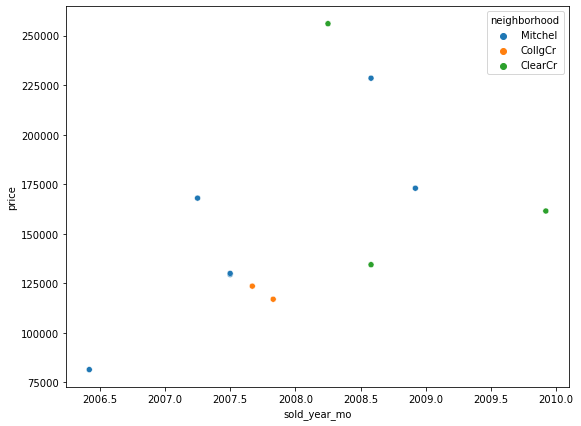

In [19]:
plt.figure(figsize=((9, 7)))
sns.scatterplot(x=fixers[fixers['neighborhood'].isin(best_neighbs.index)].sort_values(by=['sold_year_mo'])['sold_year_mo'], 
                y = fixers[fixers['neighborhood'].isin(best_neighbs.index)].sort_values(by=['sold_year_mo'])['price'], 
                hue=fixers[fixers['neighborhood'].isin(best_neighbs.index)].sort_values(by=['sold_year_mo'])['neighborhood']);


#### Basic info

In [20]:
fixers[['price', 'gr_living_sqft', 'bed', 'baths', 'neighborhood', 'basement_fin_1', 'total_basement_sqft']]

,price,gr_living_sqft,bed,baths,neighborhood,basement_fin_1,total_basement_sqft
60,81500,1600,3,2,Mitchel,0,0.0
31,168000,1622,3,1,Mitchel,4,1249.0
90,129500,845,2,1,Mitchel,5,845.0
181,130000,2034,2,1,Mitchel,0,0.0
101,123600,990,3,1,CollgCr,6,990.0
103,117000,875,3,1,CollgCr,3,385.0
104,256000,1663,2,1,ClearCr,4,1364.0
94,134432,1588,4,2,ClearCr,0,0.0
183,228500,1689,3,2,Mitchel,5,1680.0
184,173000,1200,3,1,Mitchel,5,1200.0


In [21]:
renovated = fixers.loc[fixer_index].copy()

In [22]:
renovated[features].iloc[:,35:55]

,gar_carport,quality,gr_living_sqft,kitchen_qual,garage_sqft,garage_size,total_basement_sqft,sqft_1,basement_qual,year,garage_finish,garage_year,remod_year,baths,fireplace_qual,full_bath,mas_vnr_area,foundation,fireplaces,heating_qc
60,0.0,1,1600,3.0,270.0,1.0,0.0,1600,0.0,1951,1,1951.0,1951,2,0.0,1,0.0,3,0,3.0
31,0.0,4,1622,3.0,1356.0,4.0,1249.0,1622,3.0,1961,3,1975.0,1975,1,3.0,1,149.0,3,1,5.0
90,0.0,4,845,3.0,360.0,2.0,845.0,845,3.0,1982,1,1987.0,2006,1,0.0,1,0.0,3,0,3.0
181,0.0,3,2034,3.0,1041.0,4.0,0.0,2034,0.0,1953,2,1953.0,1953,1,0.0,1,0.0,3,0,5.0
101,0.0,4,990,3.0,0.0,0.0,990.0,990,4.0,1994,0,1895.0,1995,1,0.0,1,0.0,4,0,5.0
103,0.0,4,875,4.0,728.0,2.0,385.0,875,3.0,1972,1,1975.0,2006,1,0.0,1,0.0,3,0,4.0
104,0.0,4,1663,4.0,529.0,2.0,1364.0,1663,4.0,1954,3,1954.0,1994,1,4.0,1,0.0,3,2,5.0
94,0.0,4,1588,3.0,680.0,2.0,0.0,1120,0.0,1959,3,1991.0,1959,2,4.0,2,0.0,3,1,3.0
183,0.0,4,1689,3.0,432.0,2.0,1680.0,1689,4.0,1991,1,1991.0,1991,2,3.0,2,0.0,4,1,4.0
184,0.0,4,1200,3.0,850.0,3.0,1200.0,1200,4.0,1964,3,1964.0,1964,1,0.0,1,98.0,3,0,4.0


In [23]:
renovation_cols = ['quality', 'kitchen_qual', 'basement_qual', 'garage_finish', 'remod_year', 'fireplace_qual', 'heating_qc', 'basement_fin_sqft_1',
                   'sale_type', 'basement_fin_1', 'condition', 'electrical', 'heating', 'basement_fin_2', 'sold_year_mo', 'basement_fin_sqft_2',
                   ]

In [24]:
start_date = datetime.datetime(2007, 2, 1)
renovation_complete = start_date + datetime.timedelta(days=1) + datetime.timedelta(days=21)
marketing_complete = renovation_complete + datetime.timedelta(days=2) + datetime.timedelta(days=14)
sale_date = marketing_complete + datetime.timedelta(days=1) + datetime.timedelta(days=30)
minimum_timeline = sale_date - start_date

buffer = start_date + datetime.timedelta(days=90)

timeline = pd.DataFrame({
    'purchase': [start_date, start_date + datetime.timedelta(days=1)],
    'renovation_time': [start_date + datetime.timedelta(days=1), renovation_complete],
    'marketing': [renovation_complete + datetime.timedelta(days=1), marketing_complete],
    'escrow': [marketing_complete + datetime.timedelta(days=1), sale_date],
    'sale': [sale_date + datetime.timedelta(days=1), buffer]
}, index=['start', 'finish'])

timeline

,purchase,renovation_time,marketing,escrow,sale
start,2007-02-01,2007-02-02,2007-02-24,2007-03-12,2007-04-12
finish,2007-02-02,2007-02-23,2007-03-11,2007-04-11,2007-05-02


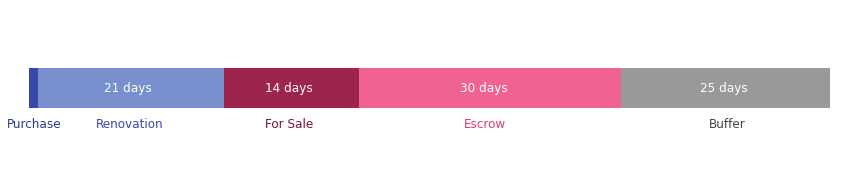

In [25]:
# Make Timeline
plt.figure(figsize=(15, 3))
plt.ylim([.75, 1.25])

# plt.yticks([])
plt.xlabel('')
ax = plt.gca()
ax.get_yaxis().set_visible(False)
ax.get_xaxis().set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

sns.lineplot(data=timeline, x='purchase', y=1, linewidth=40, color='#3949ab')
sns.lineplot(data=timeline, x='renovation_time', y=1, linewidth=40, color='#7890cd')
sns.lineplot(data=timeline, x='marketing', y=1, linewidth=40, color='#9c254d')
sns.lineplot(data=timeline, x='escrow', y=1, linewidth=40, color='#f06292')
sns.lineplot(data=timeline, x='sale', y=1, linewidth=40, color='#999999')

plt.text(x=(timeline.loc['start', 'purchase'] - datetime.timedelta(days=5) ), y=.88, s='Purchase', color='#2a3990', fontsize=12)
plt.text(x=(timeline.loc['start', 'renovation_time'] + datetime.timedelta(days=4.5) ), y=.88, s='Renovation', color='#3949ab', fontsize=12)
plt.text(x=(timeline.loc['start', 'renovation_time'] + datetime.timedelta(days=5.5) ), y=.99, s='21 days', color='white', fontsize=12)
plt.text(x=(timeline.loc['start', 'marketing'] + datetime.timedelta(days=2.5) ), y=.88, s='For Sale', color='#7c1337', fontsize=12)
plt.text(x=(timeline.loc['start', 'marketing'] + datetime.timedelta(days=2.5) ), y=.99, s='14 days', color='white', fontsize=12)
plt.text(x=(timeline.loc['start', 'escrow'] + datetime.timedelta(days=10) ), y=.88, s='Escrow', color='#db3f74', fontsize=12)
plt.text(x=(timeline.loc['start', 'escrow'] + datetime.timedelta(days=9.5) ), y=.99, s='30 days', color='white', fontsize=12)
plt.text(x=(timeline.loc['start', 'sale'] + datetime.timedelta(days=8) ), y=.88, s='Buffer', color='#434343', fontsize=12)
plt.text(x=(timeline.loc['start', 'sale'] + datetime.timedelta(days=7) ), y=.99, s='25 days', color='white', fontsize=12);

#### Coef exploration

In [26]:
coefs = pd.DataFrame(zip(poly.get_feature_names_out(), gs_r.best_estimator_.coef_), columns=['Feature', 'Weight']).sort_values(by='Weight', ascending=False)[80:100]
coefs

,Feature,Weight
2207,gar_2types basement_fin_sqft_2,0.002849
1052,n_idotrr mas_vnr_area,0.002839
2287,quality lot_sqft,0.002816
2298,gr_living_sqft^2,0.002815
2067,gar_detached lot_sqft,0.002796
2278,quality sale_type,0.002789
2061,gar_detached fence,0.002748
2767,full_bath condition,0.002747
2283,quality conds,0.002739
2967,sale_type alley_gravel,0.002732


In [27]:
coefs[-20:]

,Feature,Weight
2207,gar_2types basement_fin_sqft_2,0.002849
1052,n_idotrr mas_vnr_area,0.002839
2287,quality lot_sqft,0.002816
2298,gr_living_sqft^2,0.002815
2067,gar_detached lot_sqft,0.002796
2278,quality sale_type,0.002789
2061,gar_detached fence,0.002748
2767,full_bath condition,0.002747
2283,quality conds,0.002739
2967,sale_type alley_gravel,0.002732


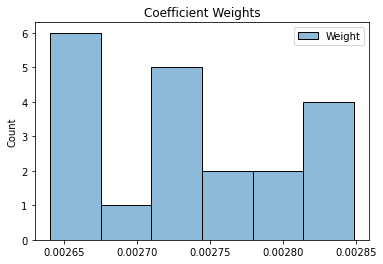

In [28]:
plt.title('Coefficient Weights')
sns.histplot(coefs);

##### sqft, neighborhood, and quality come up the most often. Of the features we can affect, quality, basement finish and fireplace appear to have the strongest relationship to value. Quality makes sense, as the higher the quality the more a property will sell for. Basement finish ties into the size of the property being a significant predictor. Will want to take advantage of this as a renovation company. We cant move the properties physically, so neighborhood will be difficult to adjust at a macro level. But the more properties we renovated, the nicer a neighborhood becomes.... in theory. In practice, unlikely to have a significant impact.

#### Lets explore the specific affect of renovating a property that has a basement, but it is 'unfinished.' So lets 'flip' the property overall condition, compare the standard flip (without basement) to the original value, and then compare further against renovating the basement.

In [29]:
# find fixer properties with basements between 0 & 3 level of finish, but at least 80" tall (basement_qual 3+)
fixers[(fixers['basement_fin_1'] < 3) & (fixers['basement_fin_1'] > 0) & (fixers['basement_qual'] >= 3)]

,id,pid,ms_subclass,frontage,lot_sqft,street_material,shape,slope,style,quality,...,roof_gable,vaneer_brk_c,vaneer_cb,vaneer_brk_face,vaneer_stone,price_log,p_sqft,sold_year_mo,baths,neighborhood
52,782,905229040,50,70.0,11250,1,3,2,1,4,...,1.0,0.0,0.0,0.0,0.0,11.99226,90.324385,2009.92,1,ClearCr


#### One fixer fits our build, of the properties sold recently. Lets explore

In [30]:
renovated.loc[52,renovation_cols + ['price', 'total_basement_sqft', 'basement_qual']]

quality                      4
kitchen_qual               3.0
basement_qual              3.0
garage_finish                1
remod_year                1989
fireplace_qual             3.0
heating_qc                 5.0
basement_fin_sqft_1        0.0
sale_type                    2
basement_fin_1               1
condition                    5
electrical                   4
heating                      2
basement_fin_2               1
sold_year_mo           2009.92
basement_fin_sqft_2        0.0
price                   161500
total_basement_sqft     1104.0
basement_qual              3.0
Name: 52, dtype: object

#### Basement sqft unadjusted

In [31]:
# make new reno df
fix_to_reno = fixers.loc[[52,]].copy()
fix_to_reno = fix_to_reno.append([fix_to_reno]*49,ignore_index=True)
# dataframe duplication adapted from StackOverflow user: Karl D.

# build linear progression of quality
fix_to_reno['quality'] = list(np.linspace(4, 10, 50))
fix_to_reno['kitchen_qual'] = list(np.linspace(3, 10, 50))
fix_to_reno['basement_qual'] = list(np.linspace(3, 3, 50))
fix_to_reno['garage_finish'] = list(np.linspace(1, 3, 50))

fix_to_reno['remod_year'] = list(np.repeat((2009.92 + 2/12), 50))
fix_to_reno['fireplace_qual'] = list(np.linspace(3, 5, 50))
fix_to_reno['heating_qc'] = list(np.linspace(5, 5, 50))
fix_to_reno['basement_fin_sqft_1'] = list(np.repeat(0, 50))

fix_to_reno['sale_type'] = list(np.repeat(2, 50))
fix_to_reno['basement_fin_1'] = list(np.repeat(0, 50))
fix_to_reno['condition'] = list(np.linspace(5, 10, 50))
fix_to_reno['electrical'] = list(np.linspace(4, 5, 50))

fix_to_reno['heating'] = list(np.repeat(2, 50))
fix_to_reno['basement_fin_2'] = list(np.repeat(0, 50))
fix_to_reno['sold_year_mo'] = list(np.repeat((2009.92 + 3/12), 50))
fix_to_reno['basement_fin_sqft_2'] = list(np.repeat(0, 50))


# generate value predictions
fix_to_reno['pred'] = single_pred(fix_to_reno)
fix_to_reno['pred_sqft'] = fix_to_reno['pred'] / fix_to_reno['gr_living_sqft']


# basement adjusted & reduction of less impactful quals
# build linear progression of quality
fix_to_reno2 = fix_to_reno.copy()

# less improvements to make way for more basement improvements
fix_to_reno['kitchen_qual'] = list(np.linspace(3, 8, 50))
fix_to_reno['fireplace_qual'] = list(np.linspace(3, 3, 50))
fix_to_reno['garage_finish'] = list(np.linspace(1, 1, 50))
fix_to_reno['electrical'] = list(np.linspace(4, 4, 50))

fix_to_reno2['basement_fin_sqft_1'] = list(np.repeat(1104, 50))
fix_to_reno2['basement_fin_1'] = list(np.linspace(1, 6, 50))
# fix_to_reno2['basement_fin_2'] = list(np.linspace(1, 6, 50))

# generate value predictions
fix_to_reno2['pred'] = single_pred(fix_to_reno2)
fix_to_reno2['pred_sqft2'] = fix_to_reno2['pred'] / fix_to_reno2['gr_living_sqft']

##### DF row duplication Source: (https://stackoverflow.com/a/24029921)

Profit for optimal renovation budget:     renovation_cost  estimated_sale_price  est_sale_basement  \
27        30.913354             135.24828         151.854913   

    purchase_price_sqft  sqft  financing   selling_fee  selling_fee2  \
27            90.324385  1788     4845.0  12091.196228  13575.829189   

    total_cost  total_cost2   cost_sqft  cost_sqft2     delta     delta2  \
27      229425       230134  128.313758  128.710291  6.934522  23.144622   

      sweet_spot  sweet_spot_basement  
27  12398.924554         41382.583784  
Profit for optimal renovation + basement reno budget:     renovation_cost  estimated_sale_price  est_sale_basement  \
30        38.687572            142.321821         160.284162   

    purchase_price_sqft  sqft  financing   selling_fee  selling_fee2  \
30            90.324385  1788     4845.0  12723.570818   14329.40405   

    total_cost  total_cost2   cost_sqft  cost_sqft2     delta     delta2  \
30      243325       244034  136.087808   136.48434

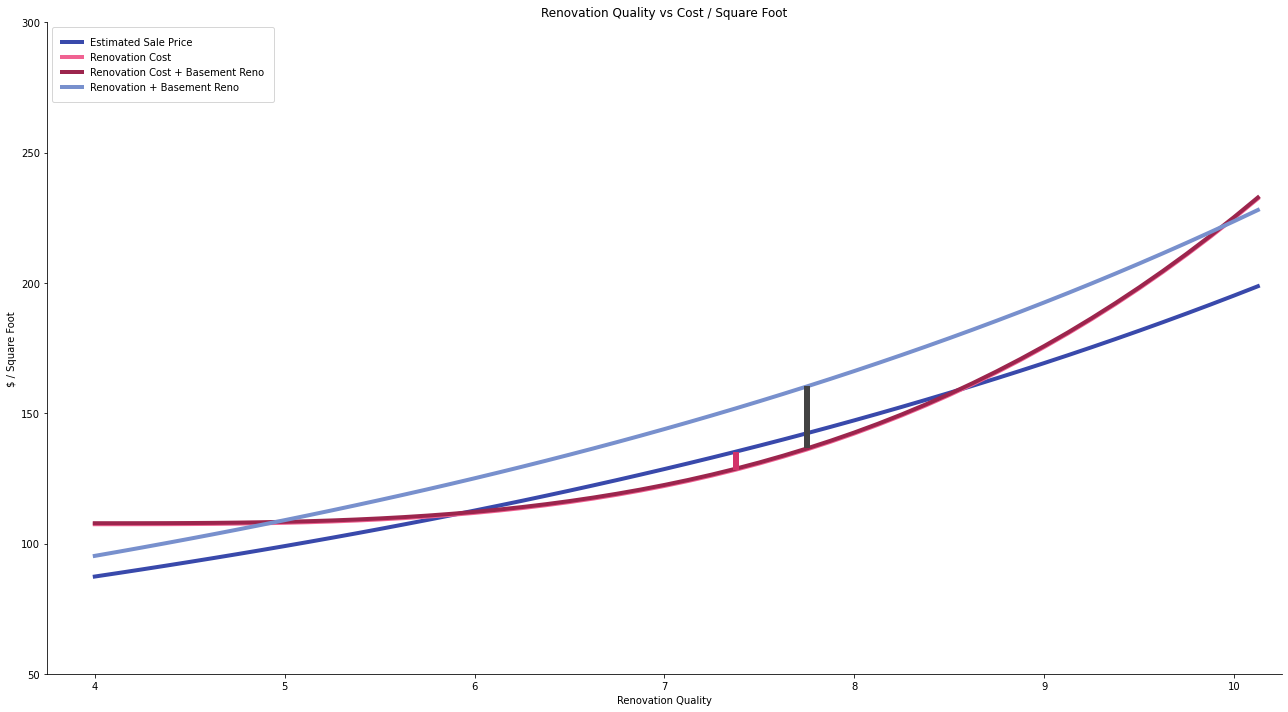

In [32]:
x = np.linspace(1, 100_000, 50)

def appreciating(a, b, x):
    return a + (b * x) ** 3

# Renovation vs quality estimator
gains = fix_to_reno['pred_sqft']
gains2 = fix_to_reno2['pred_sqft2']
cost = pd.Series(x).map(lambda __: appreciating(10, .00005, __))

cost_gain = pd.concat([cost, gains, gains2], axis=1)
cost_gain.rename({0: 'renovation_cost', 'pred_sqft': 'estimated_sale_price', 'pred_sqft2': 'est_sale_basement'}, axis=1, inplace=True)

# add expenses & sqft
cost_gain['purchase_price_sqft'] = fix_to_reno['p_sqft'][0]
cost_gain['sqft'] = fix_to_reno['gr_living_sqft'][0]
cost_gain['financing'] = fix_to_reno['price'][0] * 0.03
cost_gain['selling_fee'] = cost_gain['estimated_sale_price'] * cost_gain['sqft'] * .05
cost_gain['selling_fee2'] = cost_gain['est_sale_basement'] * cost_gain['sqft'] * .05

# no basement
cost_gain['total_cost'] = round(
        ((cost_gain['renovation_cost'] + cost_gain['purchase_price_sqft']) * # add reno cost/sqft with purchase price/sqft
        cost_gain['sqft'][0]) + # multiply by total sqft
        (cost_gain['financing'][0] + cost_gain['selling_fee'][0]), 0).astype(int) # add financing, cost to sell, and minimum profit

# with basement
cost_gain['total_cost2'] = round(
        ((cost_gain['renovation_cost'] + cost_gain['purchase_price_sqft']) * # add reno cost/sqft with purchase price/sqft
        cost_gain['sqft'][0]) + # multiply by total sqft
        (cost_gain['financing'][0] + cost_gain['selling_fee2'][0]), 0).astype(int) # add financing, cost to sell, and minimum profit


# per square foot total cost
# no basement
cost_gain['cost_sqft'] = cost_gain['total_cost'] / cost_gain['sqft']
# with basement
cost_gain['cost_sqft2'] = cost_gain['total_cost2'] / cost_gain['sqft']


# estimate profit curve
# no basement
cost_gain['delta'] = cost_gain['estimated_sale_price'] - cost_gain['cost_sqft']
# with basement
cost_gain['delta2'] = cost_gain['est_sale_basement'] - cost_gain['cost_sqft2']

# isolate optimal cost curve
cost_gain['sweet_spot'] = (cost_gain['estimated_sale_price'] - cost_gain['cost_sqft']) * cost_gain['sqft']
cost_gain['sweet_spot_basement'] = (cost_gain['est_sale_basement'] - cost_gain['cost_sqft2']) * cost_gain['sqft']


# plot
plt.figure(figsize=(18, 10))
plt.plot(cost_gain.index, cost_gain['estimated_sale_price'], c='#3949ab', linewidth=4, label='Estimated Sale Price')
plt.plot(cost_gain.index, cost_gain['cost_sqft'], c='#f06292', linewidth=4, label = 'Renovation Cost')


# plot gains/cost with basement addition
plt.plot(cost_gain.index, cost_gain['cost_sqft2'], c='#9c254d', linewidth=4, label = 'Renovation Cost + Basement Reno')
plt.plot(cost_gain.index, cost_gain['est_sale_basement'], c='#7890cd', linewidth=4, label = 'Renovation + Basement Reno')

# Labels
plt.legend(loc='upper left', borderpad=1)
plt.title('Renovation Quality vs Cost / Square Foot')
plt.xlabel('Renovation Quality')
plt.ylabel('$ / Square Foot')
plt.xticks(ticks=[0, 8, 16, 24, 32, 40, 48], labels=[4, 5, 6, 7, 8, 9, 10])

# Axis
plt.xlim([-2, 50])
plt.ylim([50, 300])

# Esimate Profits
sweet_spot = cost_gain[cost_gain['delta'] == max(cost_gain['delta'])]
sweet_basement = cost_gain[cost_gain['delta2'] == max(cost_gain['delta2'])]
print(f'Profit for optimal renovation budget: {sweet_spot}')
print(f'Profit for optimal renovation + basement reno budget: {sweet_basement}')

# Optimized Budget line
plt.vlines(x=cost_gain[cost_gain['delta'] == max(cost_gain['delta'])].index,
           ymin=cost_gain[cost_gain['delta'] == max(cost_gain['delta'])]['cost_sqft'],
           ymax=cost_gain[cost_gain['delta'] == max(cost_gain['delta'])]['estimated_sale_price'],
           color='#d23369', linewidth=6, label='Optimized Profit Standard')

# Optimized Budget line for Basement Reno
plt.vlines(x=cost_gain[cost_gain['delta2'] == max(cost_gain['delta2'])].index,
           ymin=cost_gain[cost_gain['delta2'] == max(cost_gain['delta2'])]['cost_sqft2'],
           ymax=cost_gain[cost_gain['delta2'] == max(cost_gain['delta2'])]['est_sale_basement'],
           color='#434343', linewidth=6, label='Optimized Profit w/ Basement')
           
sns.despine()
plt.tight_layout()
# plt.savefig('./images/transparent_value_only.png', transparent=True);

In [33]:
sweet_spot

,renovation_cost,estimated_sale_price,est_sale_basement,purchase_price_sqft,sqft,financing,selling_fee,selling_fee2,total_cost,total_cost2,cost_sqft,cost_sqft2,delta,delta2,sweet_spot,sweet_spot_basement
27,30.913354,135.24828,151.854913,90.324385,1788,4845.0,12091.196228,13575.829189,229425,230134,128.313758,128.710291,6.934522,23.144622,12398.924554,41382.583784


In [34]:
sweet_basement

,renovation_cost,estimated_sale_price,est_sale_basement,purchase_price_sqft,sqft,financing,selling_fee,selling_fee2,total_cost,total_cost2,cost_sqft,cost_sqft2,delta,delta2,sweet_spot,sweet_spot_basement
30,38.687572,142.321821,160.284162,90.324385,1788,4845.0,12723.570818,14329.40405,243325,244034,136.087808,136.48434,6.234014,23.799822,11146.416367,42554.081002


['n_grnhill', 'n_greens', 'n_blueste', 'n_npkvill', 'n_veenker', 'n_brdale', 'n_blmngtn', 'n_meadowv', 'n_clearcr', 'n_swisu', 'n_stonebr', 'n_timber', 
'n_noridge', 'n_idotrr', 'n_crawfor', 'n_brkside', 'n_mitchel', 'n_sawyerw', 'n_nwames', 'n_sawyer', 'n_gilbert', 'n_nridght', 'n_somerst', 'n_edwards', 'n_oldtown', 
'n_collgcr', 'n_names', 'type_twn', 'type_sf', 'type_twn_end', 'gar_attached', 'gar_detached', 'gar_builtin', 'gar_basement', 'gar_2types', 'gar_carport', 'quality', 
'gr_living_sqft', 'kitchen_qual', 'garage_sqft', 'garage_size', 'total_basement_sqft', 'sqft_1', 'basement_qual', 'year', 'garage_finish', 'garage_year', 'remod_year', 
'baths', 'fireplace_qual', 'full_bath', 'mas_vnr_area', 'foundation', 'fireplaces', 'heating_qc', 'basement_exposure', 'basement_fin_sqft_1', 'gar_attached', 'sale_type', 
'basement_fin_1', 'shape', 'fence', 'kitchen', 'conds', 'condition', 'contour_hill', 'contour_bank', 'contour_level', 'alley_gravel', 'alley_pave', 'street_material', 
'low_qual_sqft', 'lot_sqft', 'electrical', 'heating', 'basement_fin_2', 'sold_year_mo', 'basement_fin_sqft_2']

#### Ultimate Conclusions:
Model performance has been affected by many, many features. Neighborhood, square footage, quality level across many sub-categories, garage, year built, remodel year, lot size/shape and many more features (full list above) can significantly impact the final sales price.

Because the model utilized polynomial feature transformation (a downfall), some of the exact impacts of individual coefficients is difficult to quantify. This is precisely why I decided to graph the relationship to price as features evolve. A success of the model.

'Quality' is about as subjective a predictive metric as they come. Likely why we see some funkiness between quality 9 and 10 homes. There is probably some human bias sprinkled in along the way. But functionally, the metric worked very well for the predictions.

The objective to manipulate resale price by adjusting property condition can be achieved, to different degrees of success, by adjusting property features that can be renovated. Think kitchen quality, heating quality, kitchen quality, etc, etc. 

We, as house flippers, cannot affect the neighborhood, lot size/shape/conditions, or the year the property was built.

Harnessing the power of machine learning, we can tweak features and examine the relationship to sales price on a graph as the feature strength increases or decreases. We can then make business decisions related to those change in values.

I have isolated finished basement square footage as a perfect example of how adjusting a feature that the home renovator can control (assuming the property has a basement) is used to increase projected profits on a flip project. I liked basement square footage because it is very similar to one of our strongest predictors (square footage) that the house flipper cannot change in their 90-day flip window.

---
Some improvements that can be made to the execution of the model insights would be to write a function and make a GUI for the user to manually adjust parameters as they relate to specific property renovations. Turn the model into a usable tool. This would fall under the product development umbrella more than the data science umbrella, but it would be a fun project to work on.